In [1]:
#Importation de la base de donnée
import pandas as pd

df = pd.read_excel("/Users/admin/Desktop/MIASHS/MasterM1SSD/ProjetNA/NA_les34dernierspays.xlsx", sheet_name=None)  # dict: nom_feuille -> DataFrame
df
df = df['Feuil1']
# Exemple d'accès à une feuille:
df.head()

# Import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Country                                   34 non-null     object        
 1   Quality Score                             34 non-null     object        
 2   SDGi                                      31 non-null     float64       
 3   Life Expectancy                           31 non-null     float64       
 4   HDI                                       33 non-null     float64       
 5   Per Capita GDP                            34 non-null     object        
 6   Region                                    34 non-null     object        
 7   Income Group                              34 non-null     object        
 8   Population (millions)                     34 non-null     float64       
 9   Cropland Footprint                

                                              SDGi  Life Expectancy       HDI  \
SDGi                                      1.000000         0.930340  0.912700   
Life Expectancy                           0.930340         1.000000  0.926081   
HDI                                       0.912700         0.926081  1.000000   
Population (millions)                     0.253692         0.227419  0.279927   
Cropland Footprint                        0.438805         0.273641  0.313689   
Grazing Footprint                        -0.025749        -0.011752  0.009180   
Forest Product Footprint                  0.382377         0.314041  0.344412   
Fish Footprint                            0.371434         0.411424  0.392550   
Built up land                             0.508058         0.325380  0.333377   
Carbon Footprint                          0.324662         0.376327  0.547555   
Total Ecological Footprint (Production)   0.501375         0.468422  0.624502   
Cropland Footprint.1        

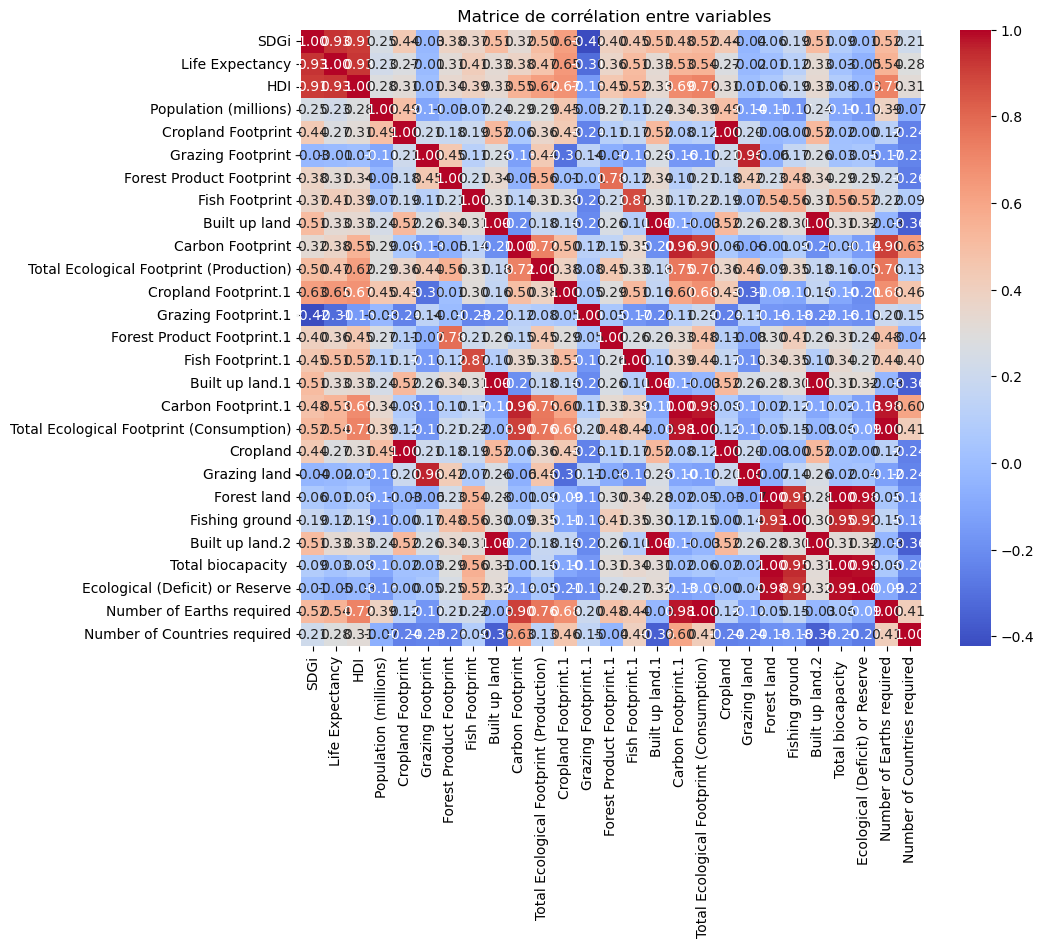

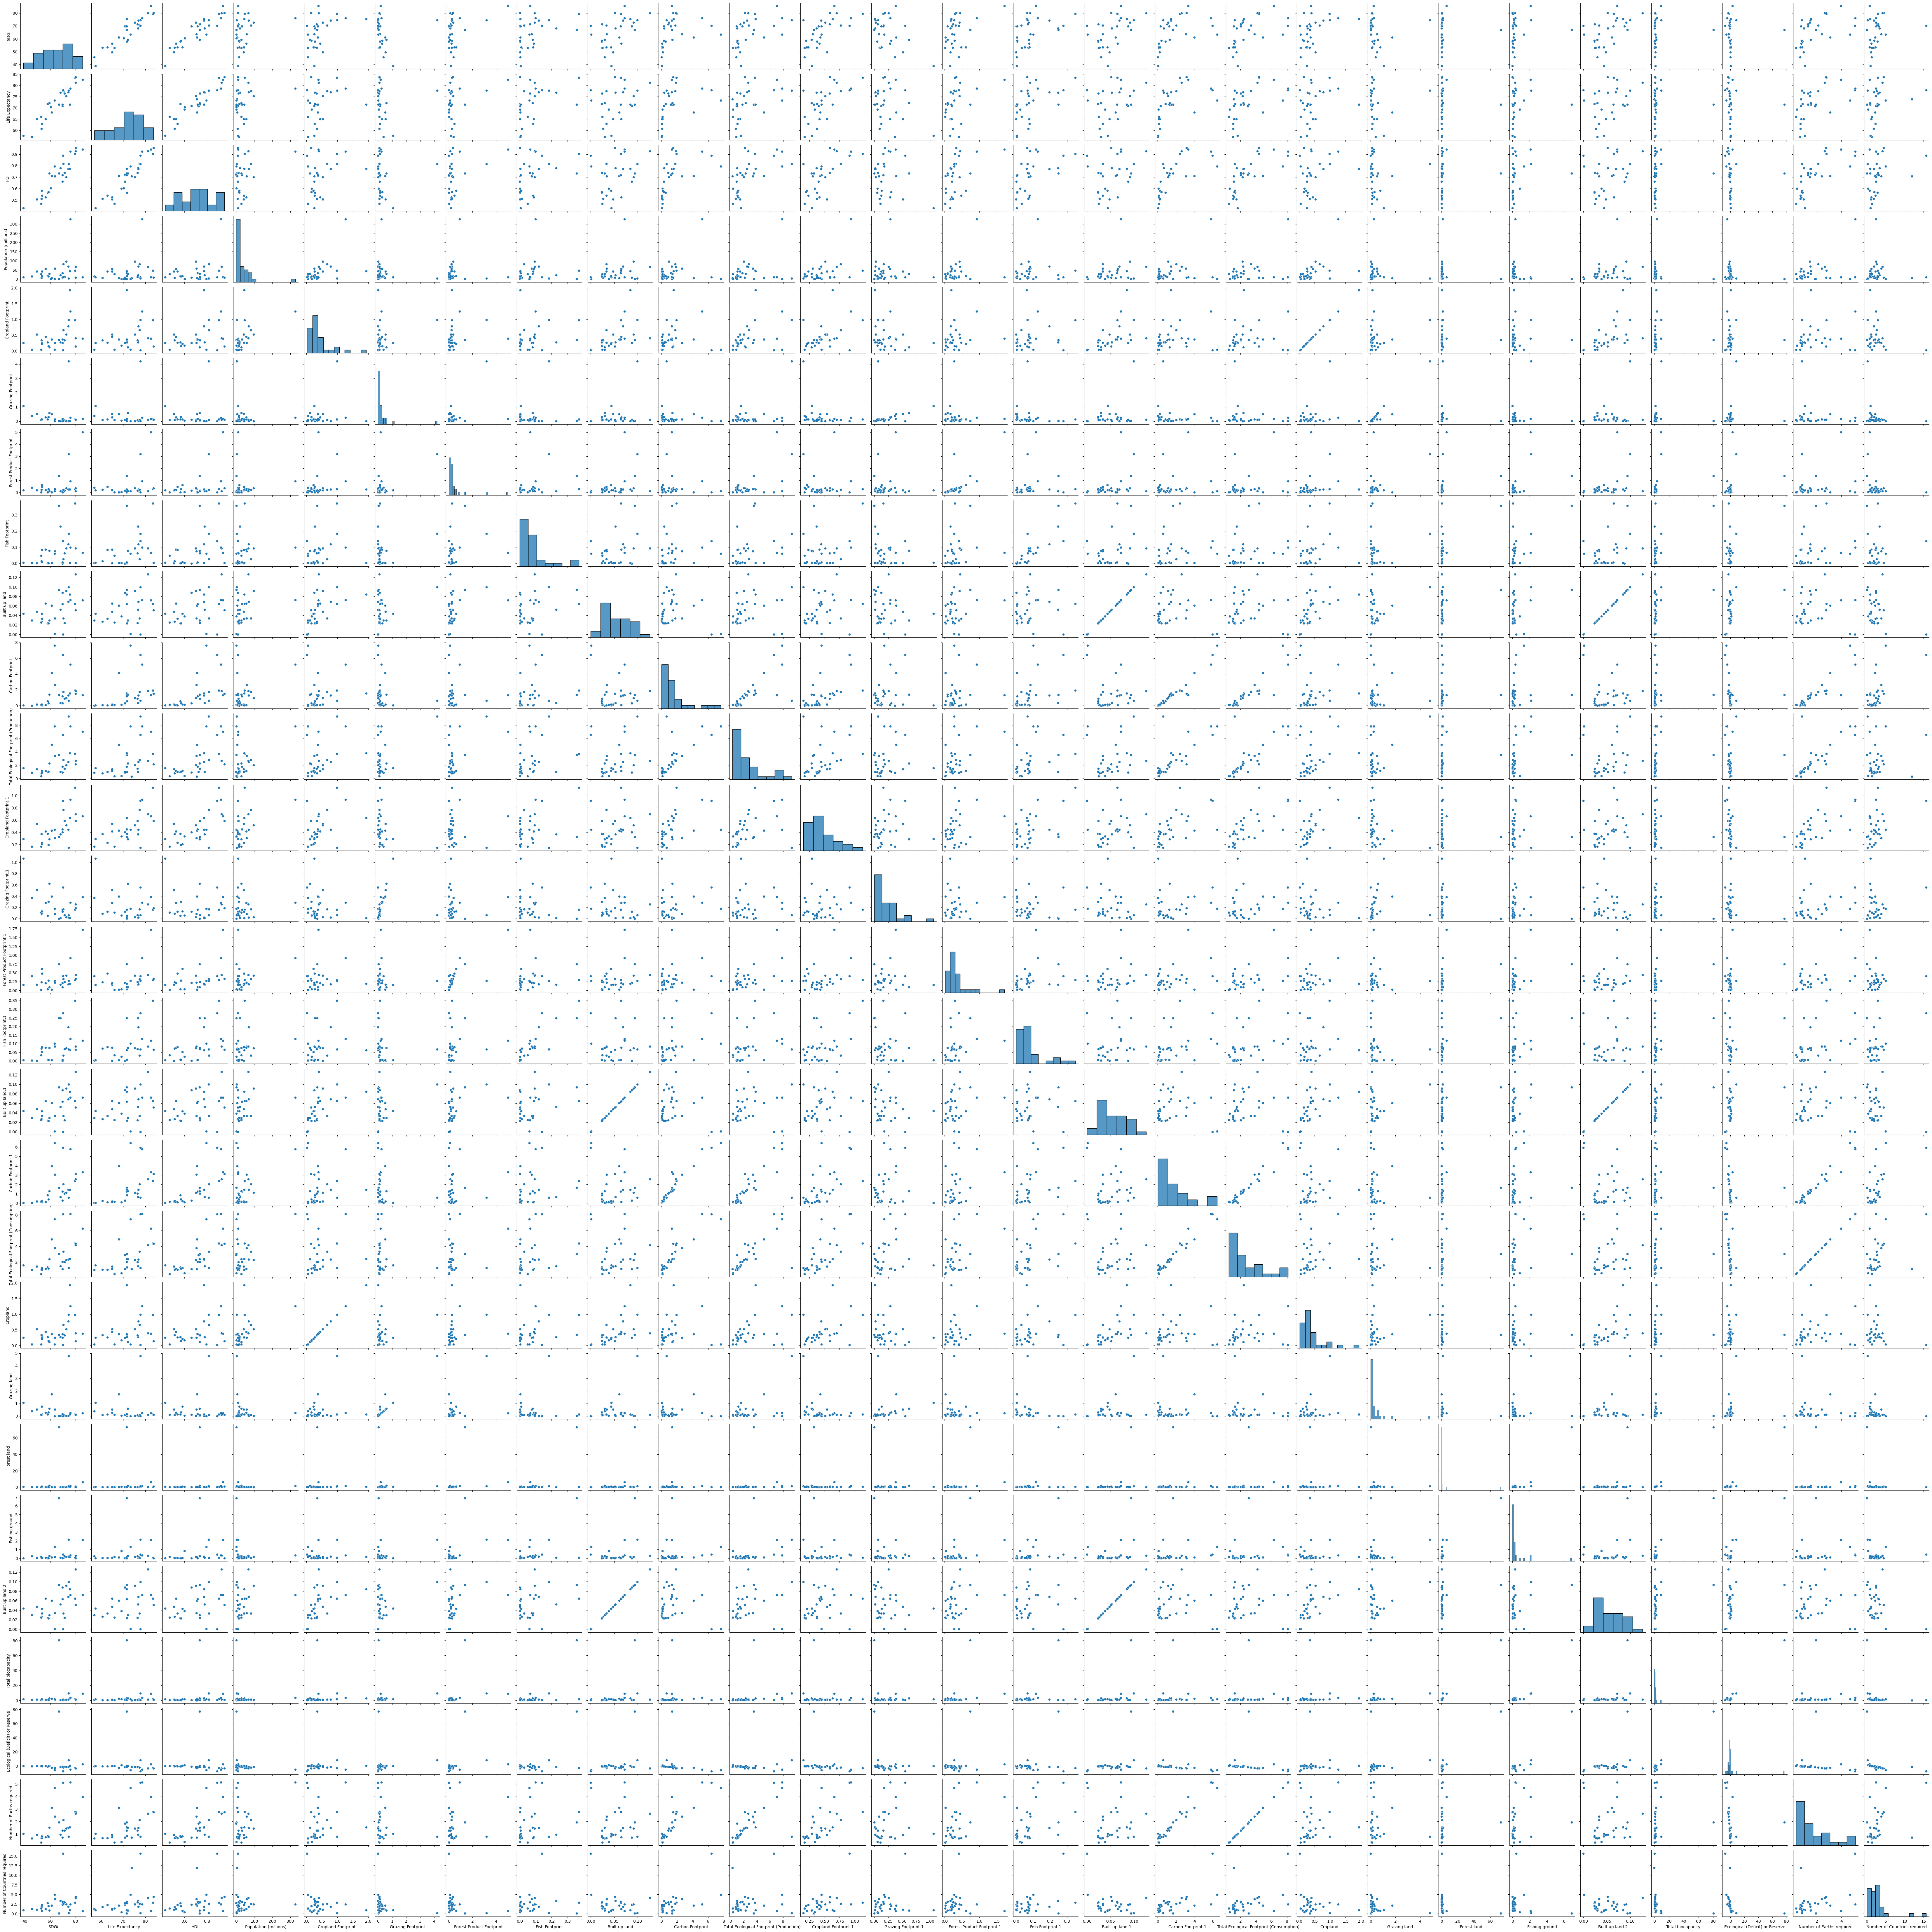

In [4]:
numeric_cols = df.select_dtypes(include='number').columns

# Matrice de corrélation
corr_matrix = df[numeric_cols].corr()

# Heatmap de la matrice de corrélation
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(' Matrice de corrélation entre variables')
plt.show()

# Scatterplot matrix (facultatif mais utile)
sns.pairplot(df[numeric_cols])
plt.show()



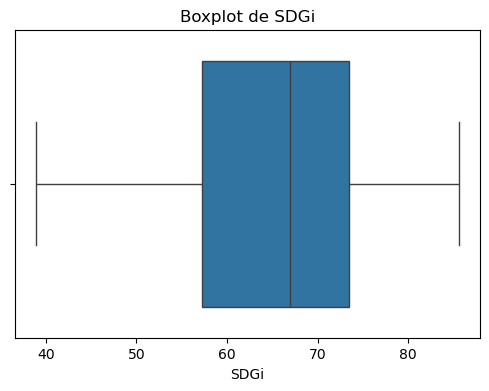

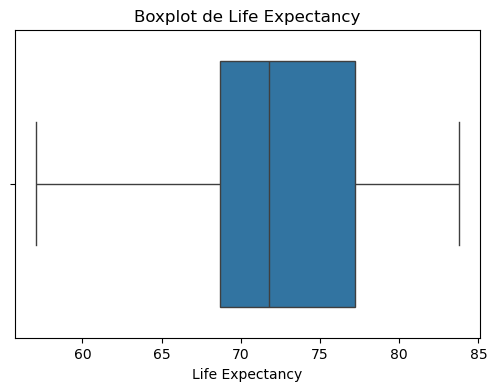

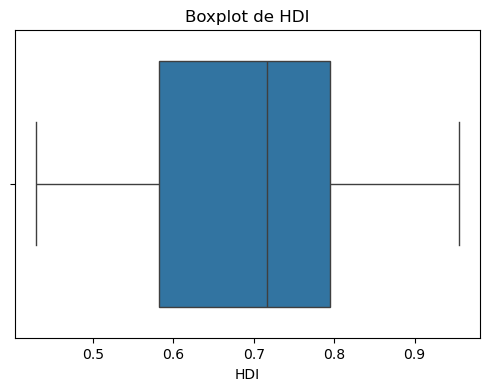

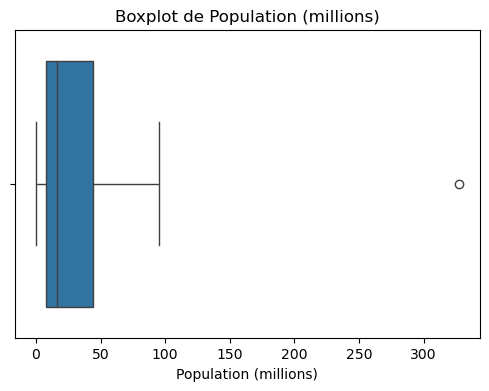

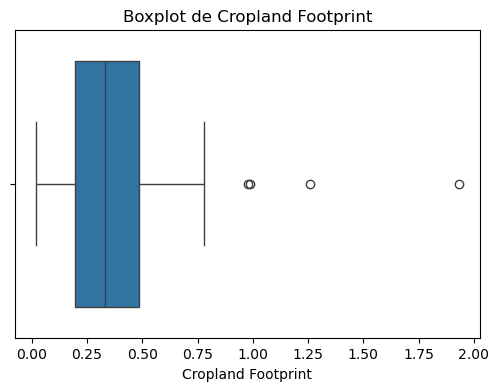

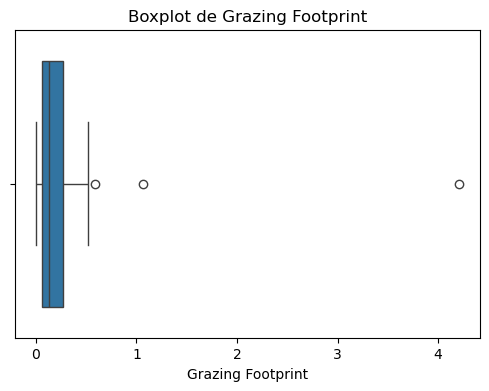

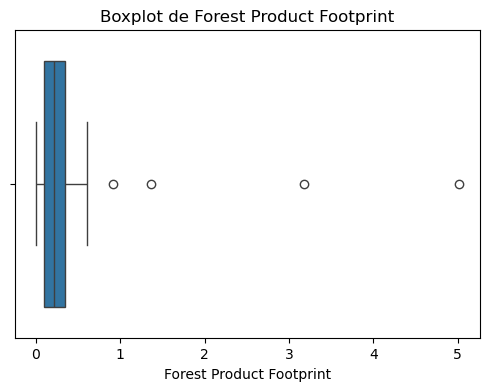

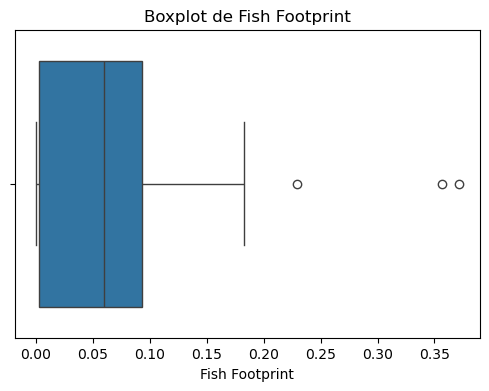

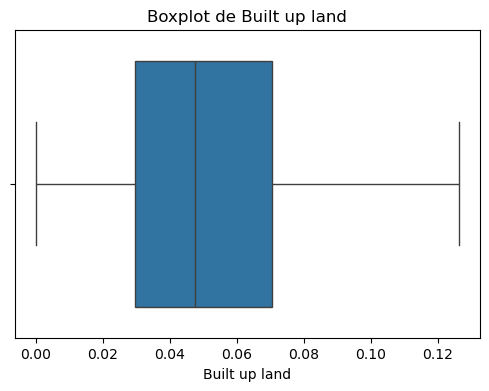

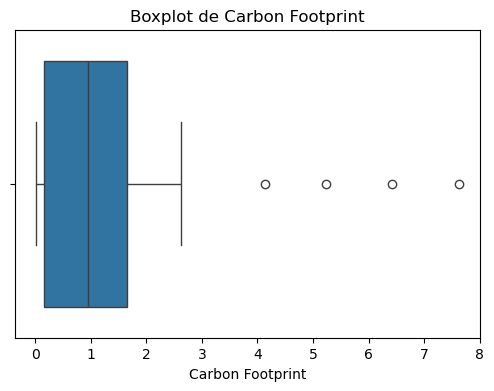

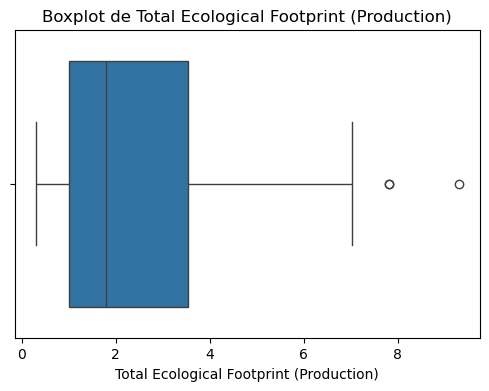

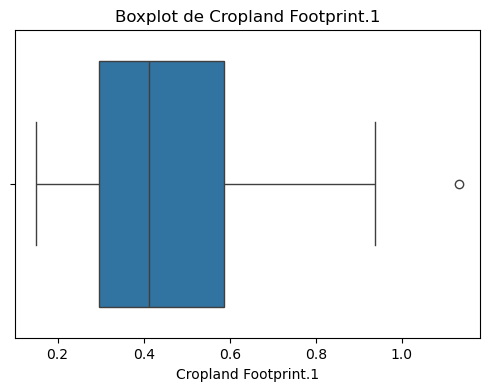

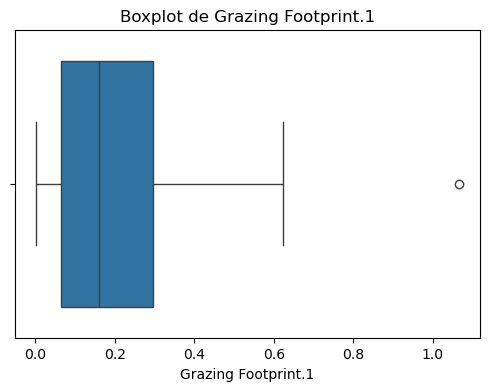

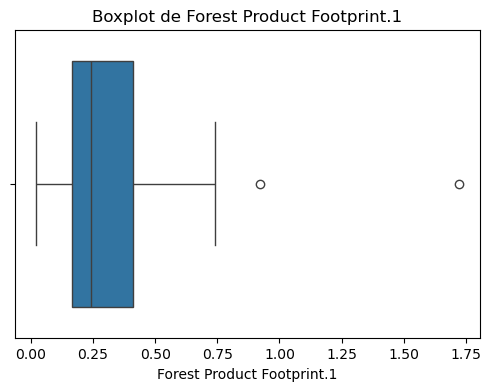

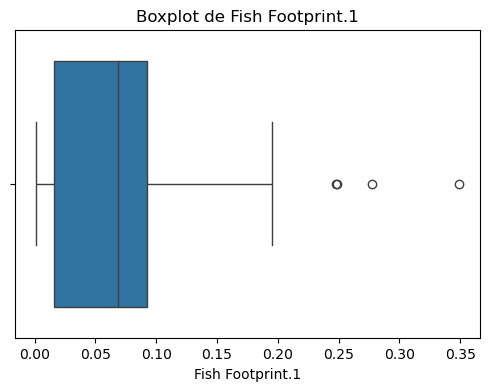

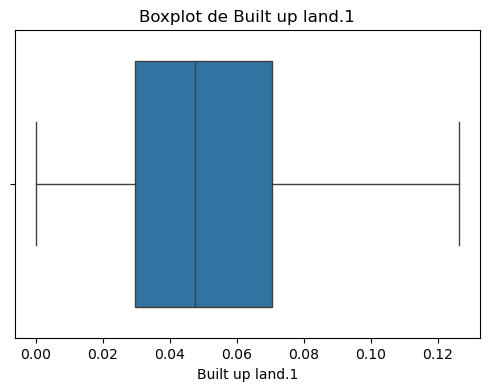

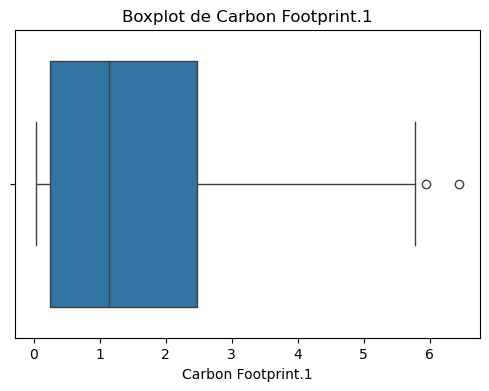

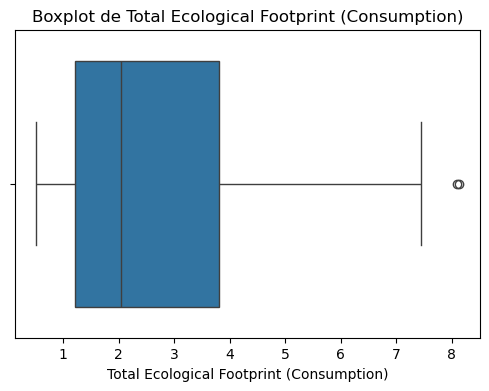

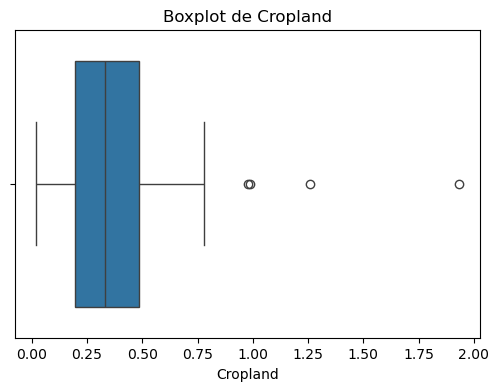

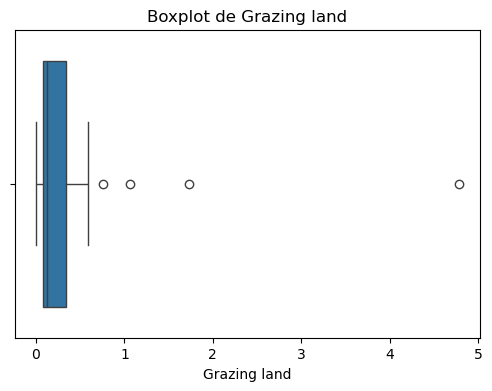

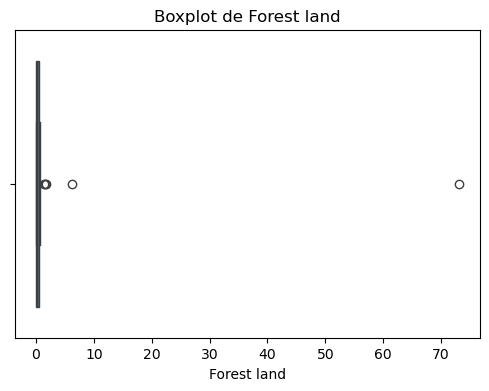

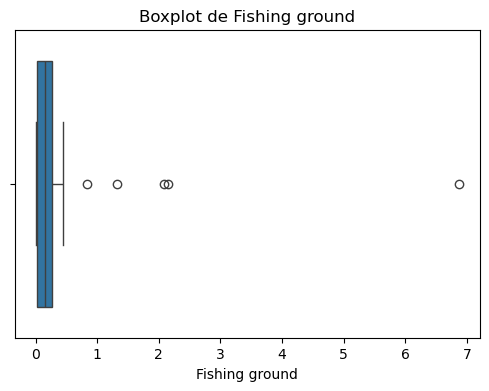

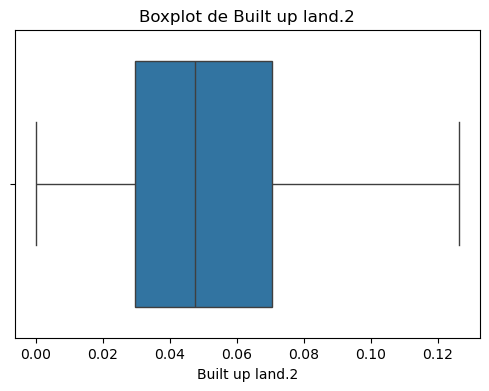

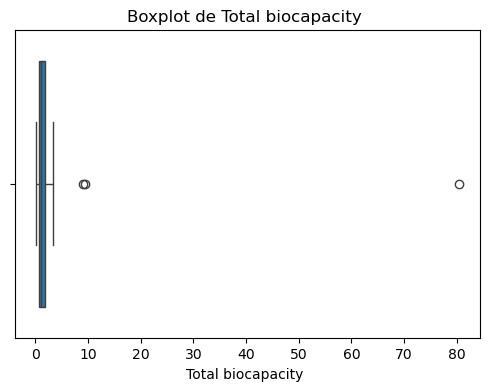

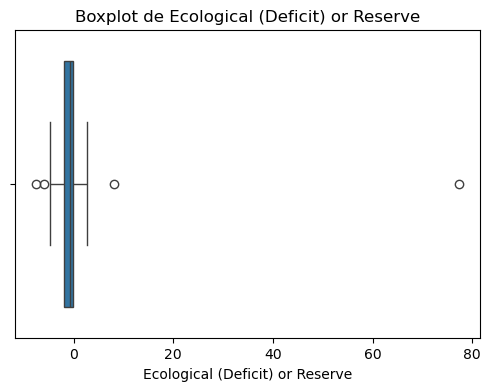

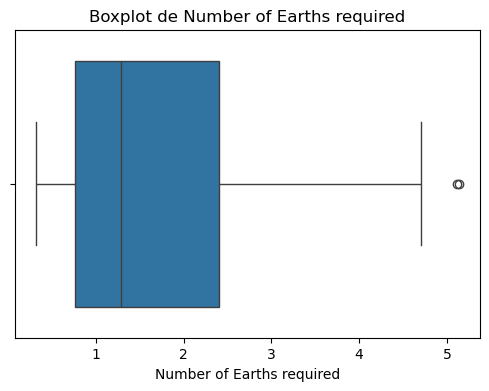

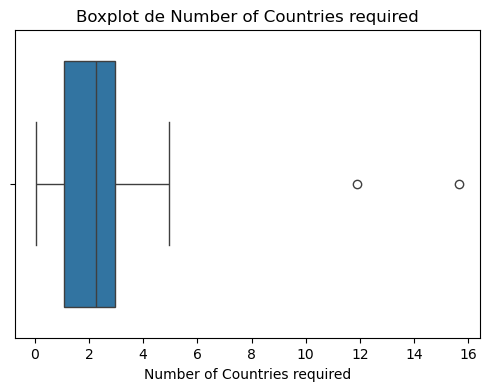

In [ ]:
# Boxplots pour détecter des outliers
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [10]:
import pandas as pd
import numpy as np

# Nom de la colonne pays (ajuste si nécessaire)
country_col = "Country"

# Colonnes numériques
num_cols = df.select_dtypes(include=['number']).columns

# Détection des outliers + affichage propre
print(" VALEURS ABERRANTES PAR VARIABLE ")

for col in num_cols:
    data = df[[country_col, col]].dropna()

    # Quartiles
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Seuils
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Outliers
    outliers = data[(data[col] < lower) | (data[col] > upper)]

    # Affichage propre
    if len(outliers) > 0:
        print(f"\n {col}")
        print("-" * (len(col) + 5))
        for _, row in outliers.iterrows():
            print(f"• {row[country_col]} — {row[col]:.6f}")
    else:
        print(f"\n {col}")
        print("-" * (len(col) + 5))
        print("Aucun outlier détecté")

print("\n======================")
print(" FIN DU RAPPORT ")
print("======================")


 VALEURS ABERRANTES PAR VARIABLE 

 SDGi
---------
Aucun outlier détecté

 Life Expectancy
--------------------
Aucun outlier détecté

 HDI
--------
Aucun outlier détecté

 Population (millions)
--------------------------
• United States of America — 327.096000

 Cropland Footprint
-----------------------
• Spain — 0.977626
• Ukraine — 1.931443
• United States of America — 1.257497
• Uruguay — 0.989640

 Grazing Footprint
----------------------
• South Sudan — 1.064002
• Uruguay — 4.204667
• Venezuela, Bolivarian Republic of — 0.592644

 Forest Product Footprint
-----------------------------
• Suriname — 1.362405
• Sweden — 5.010404
• United States of America — 0.915305
• Uruguay — 3.181954

 Fish Footprint
-------------------
• Spain — 0.371291
• Sri Lanka — 0.229320
• Suriname — 0.356750

 Built up land
------------------
Aucun outlier détecté

 Carbon Footprint
---------------------
• Trinidad and Tobago — 7.620682
• Turkmenistan — 4.140586
• United Arab Emirates — 6.419420
• United

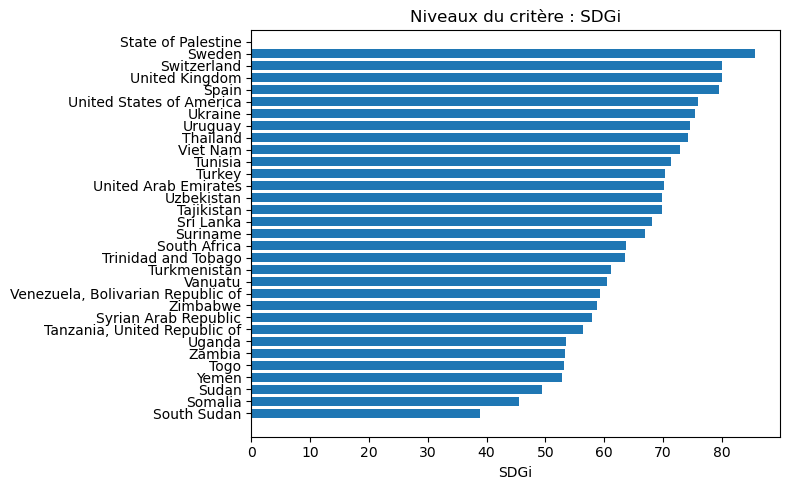

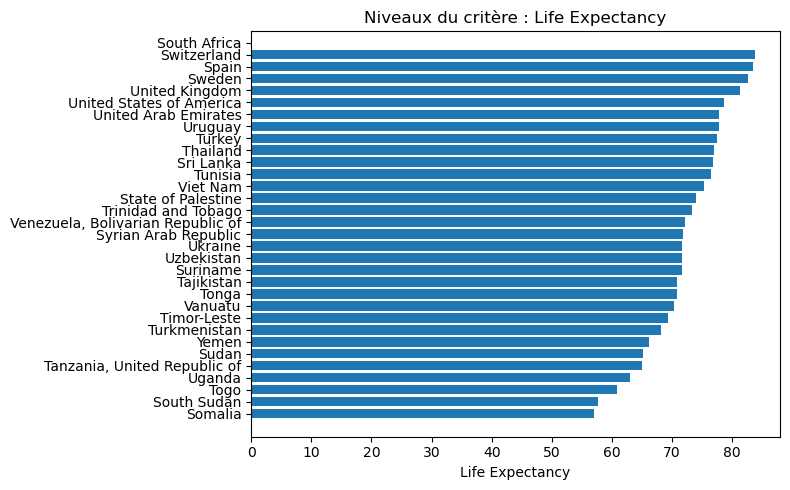

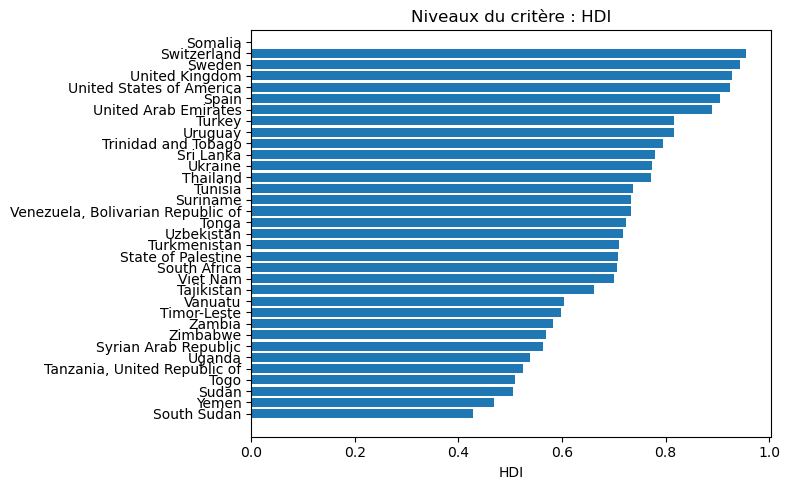

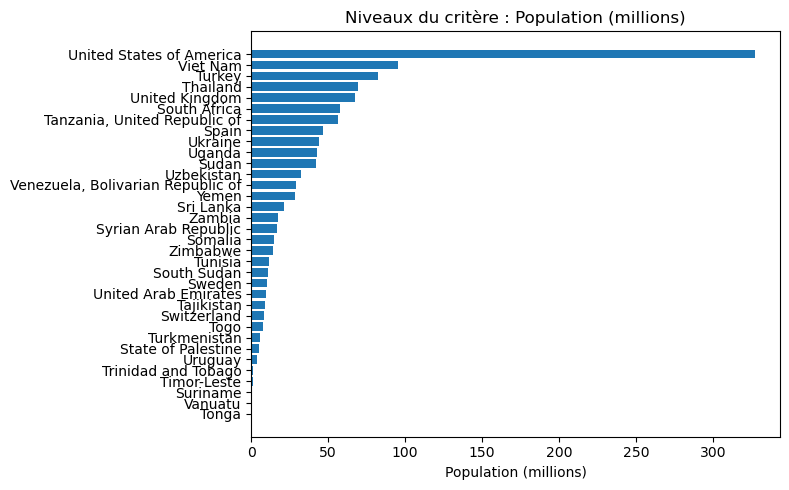

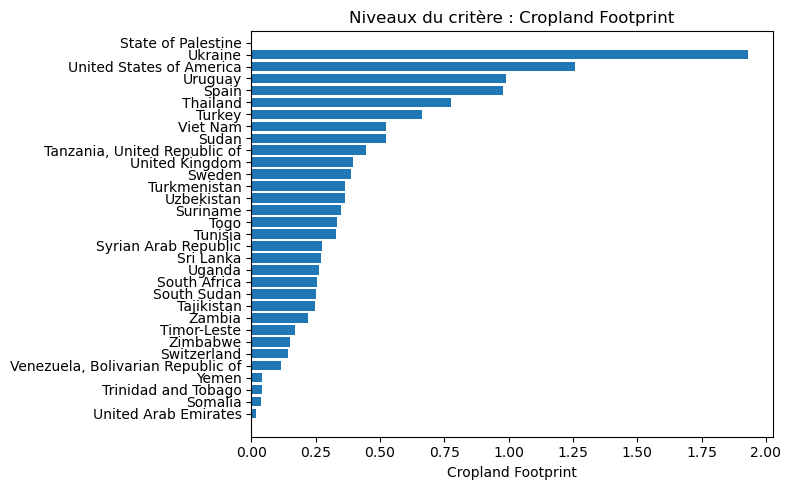

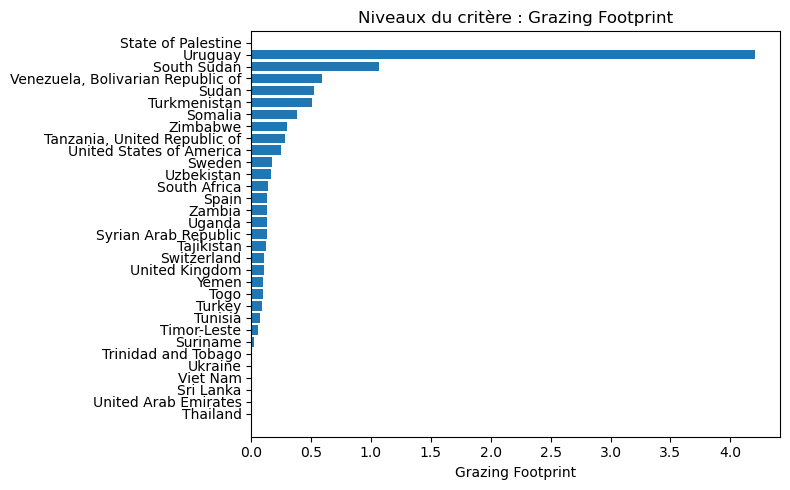

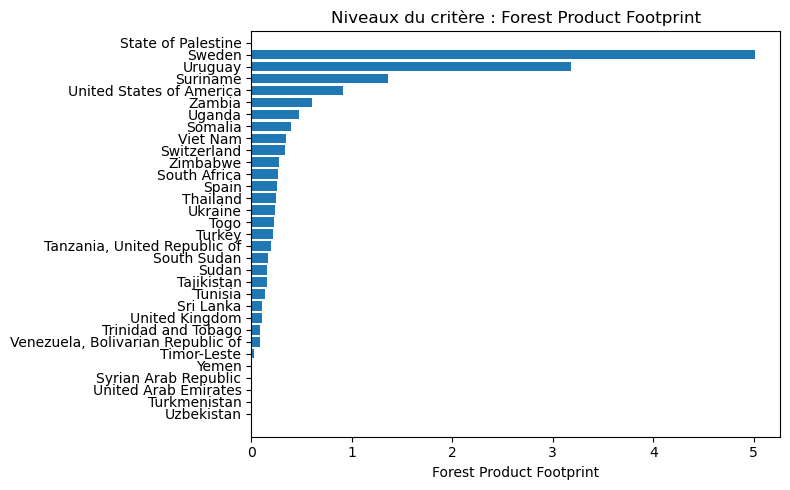

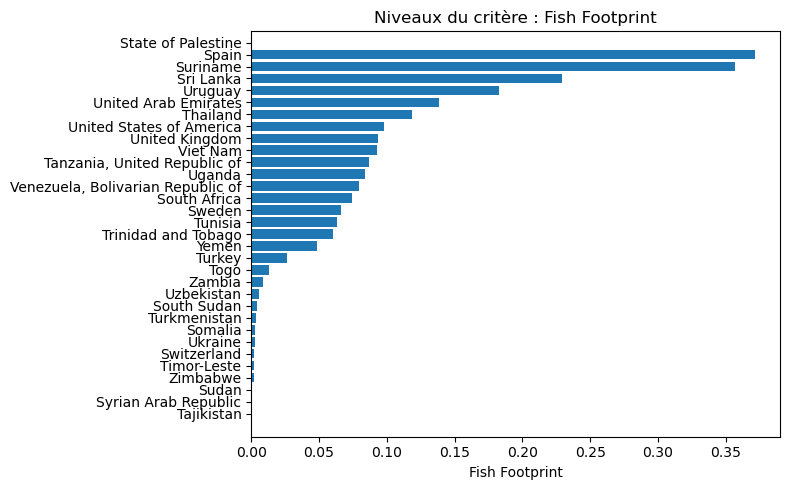

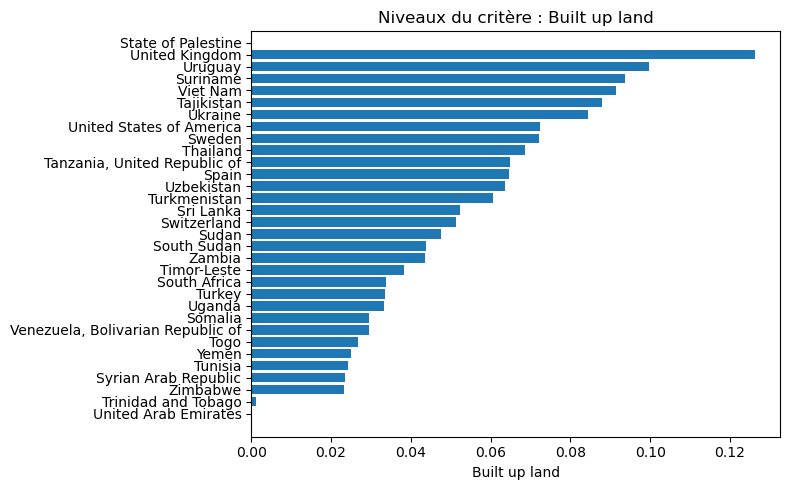

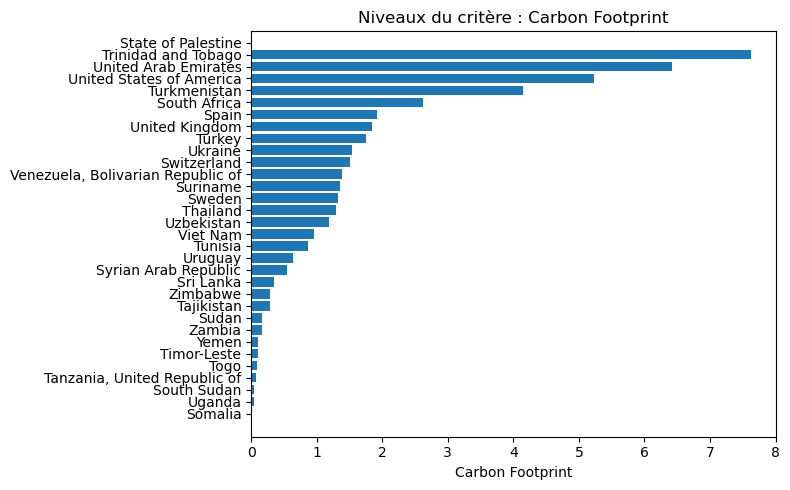

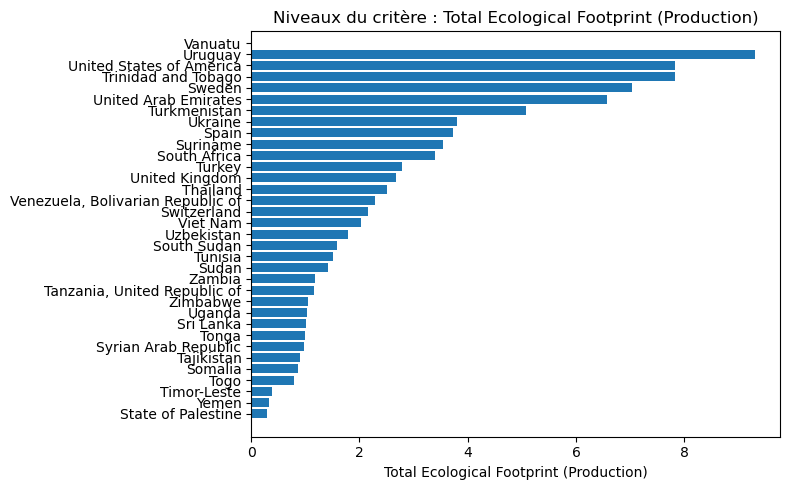

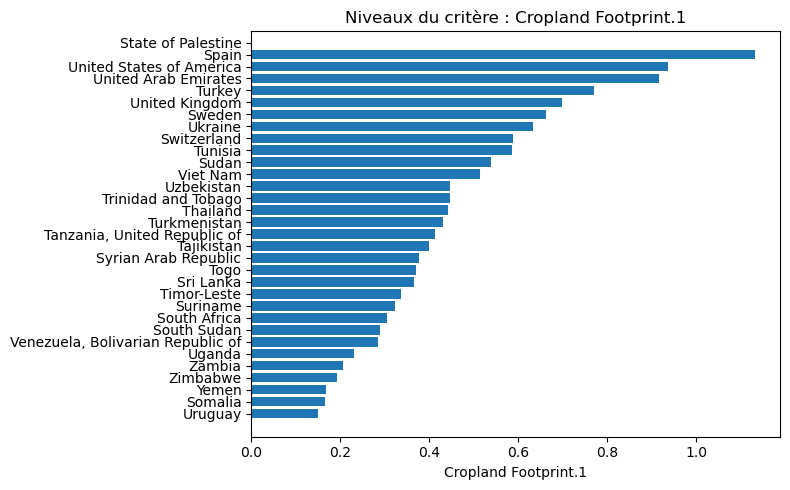

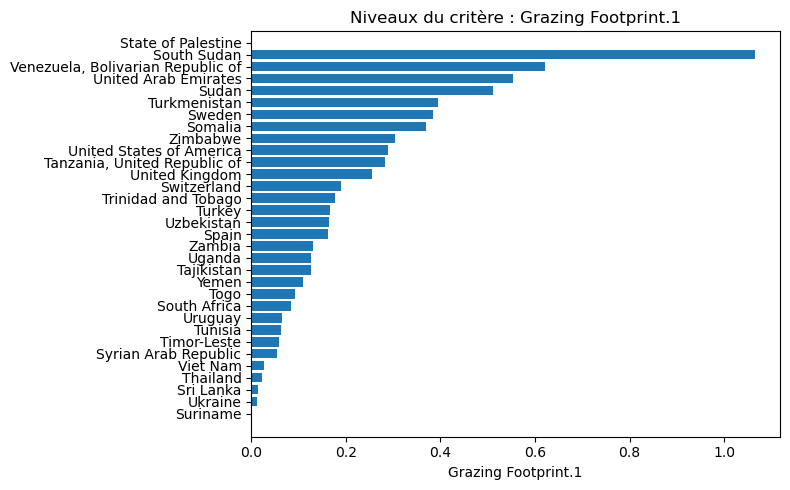

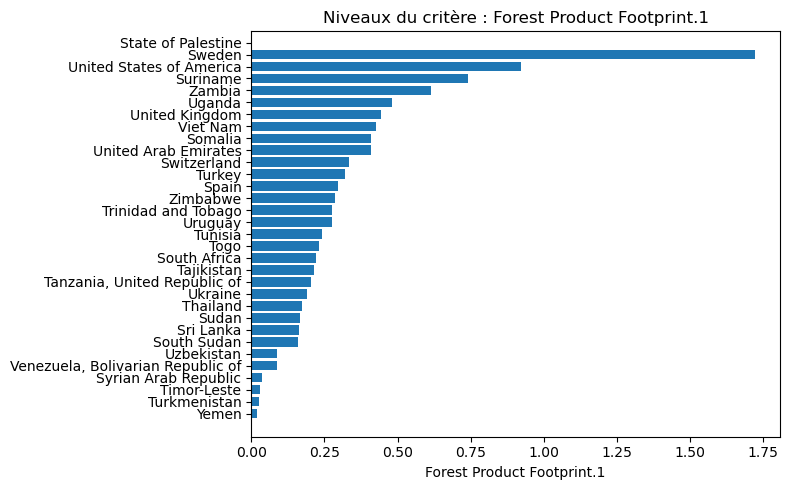

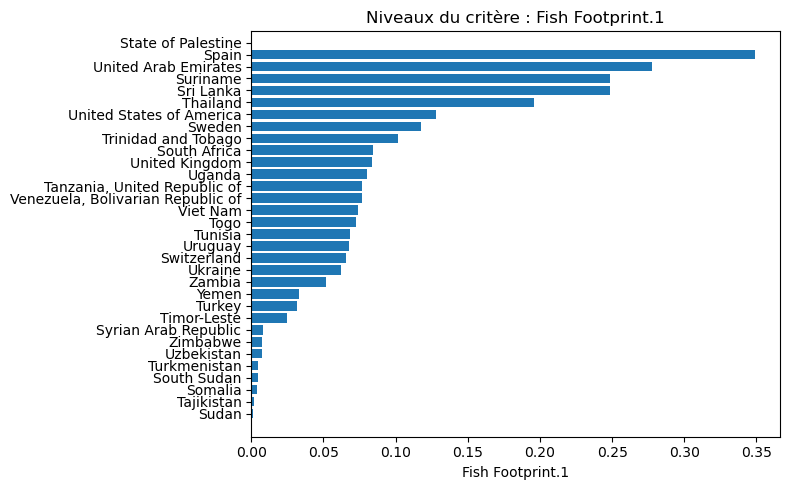

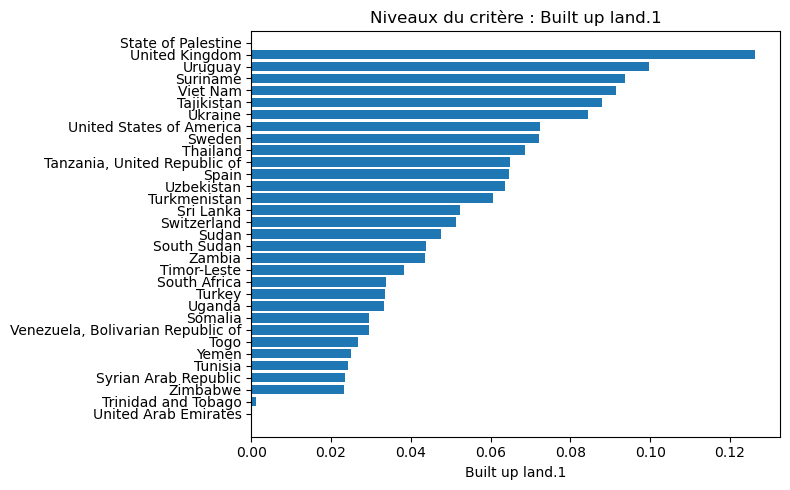

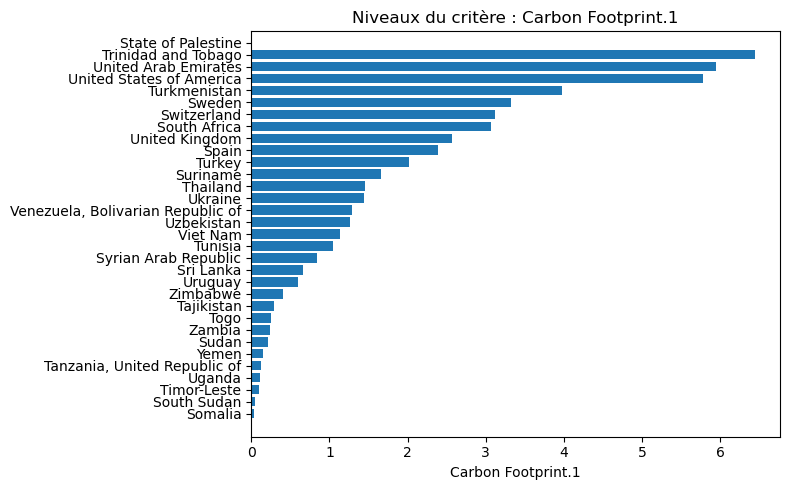

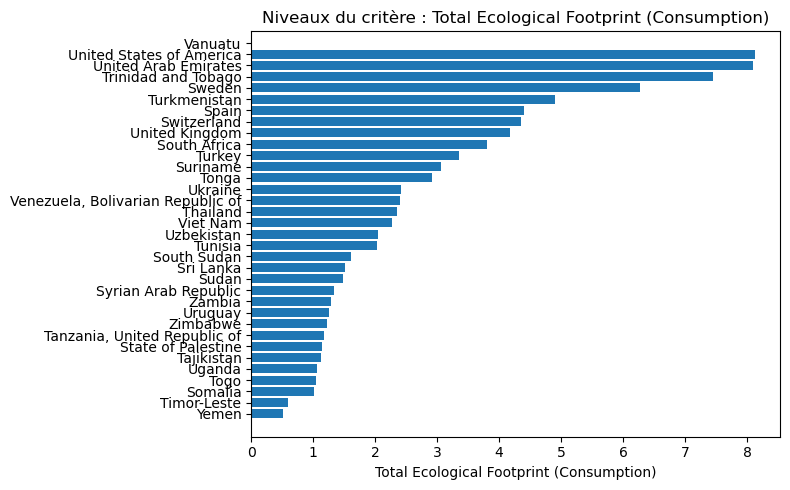

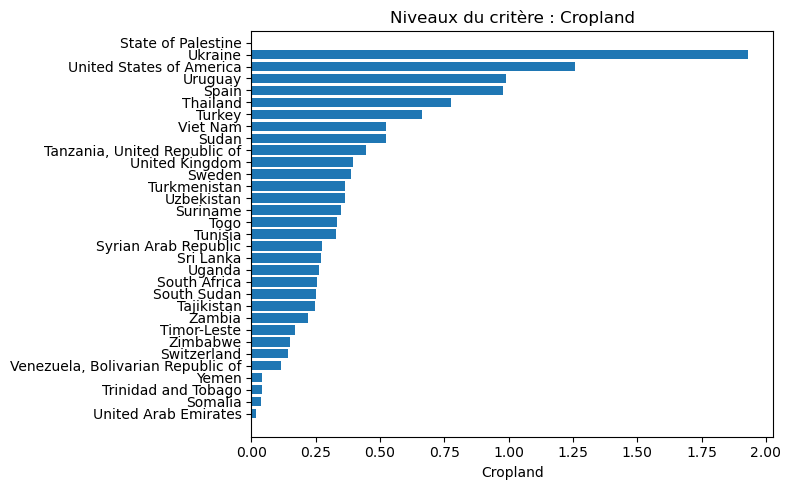

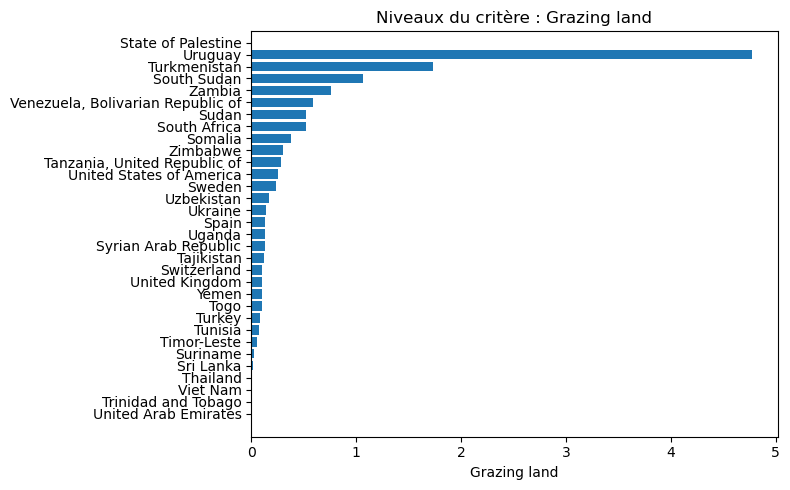

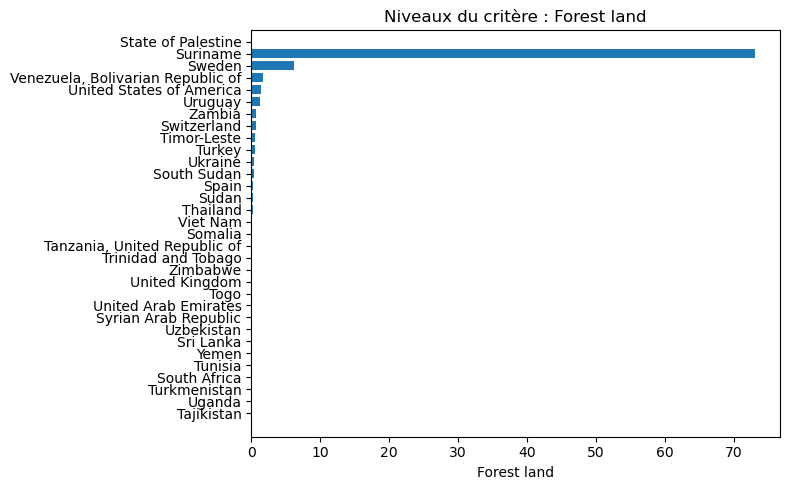

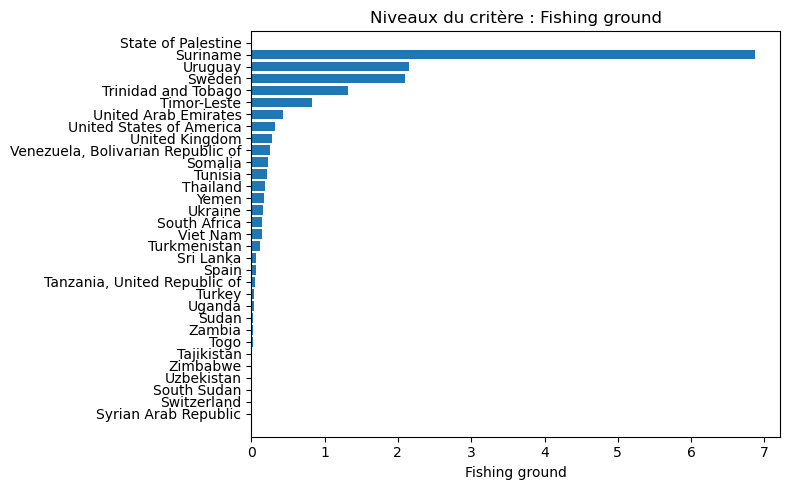

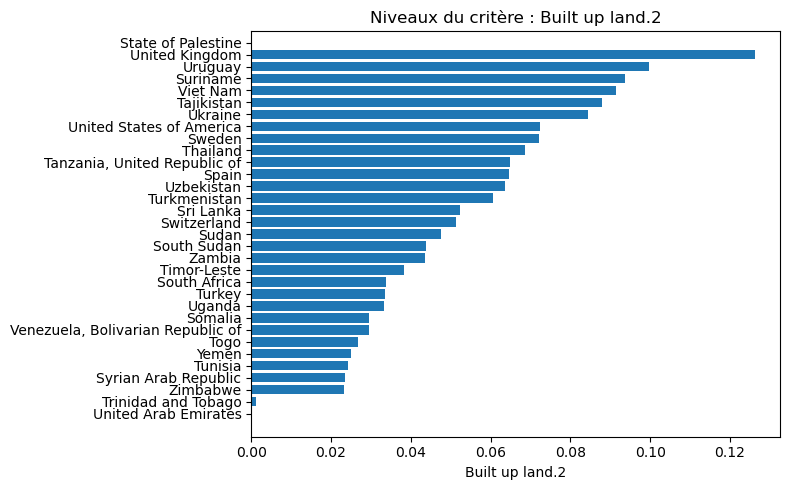

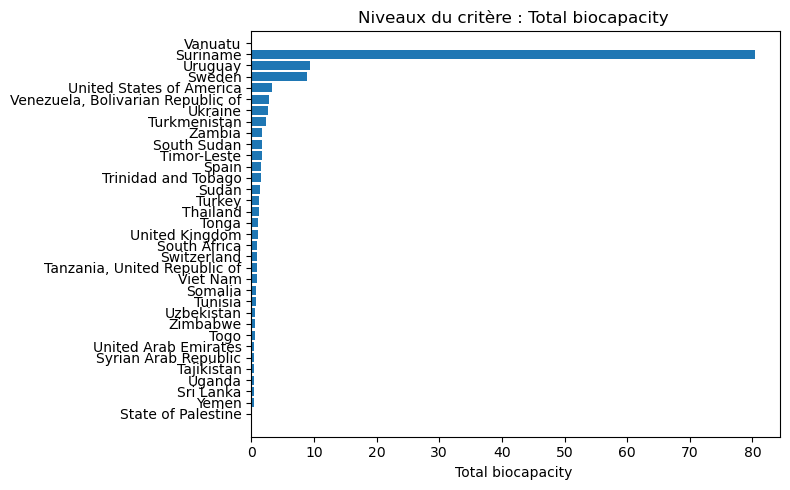

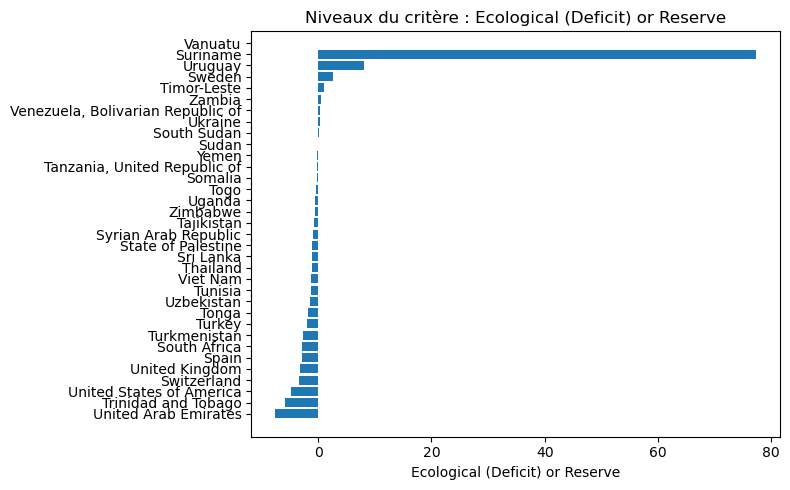

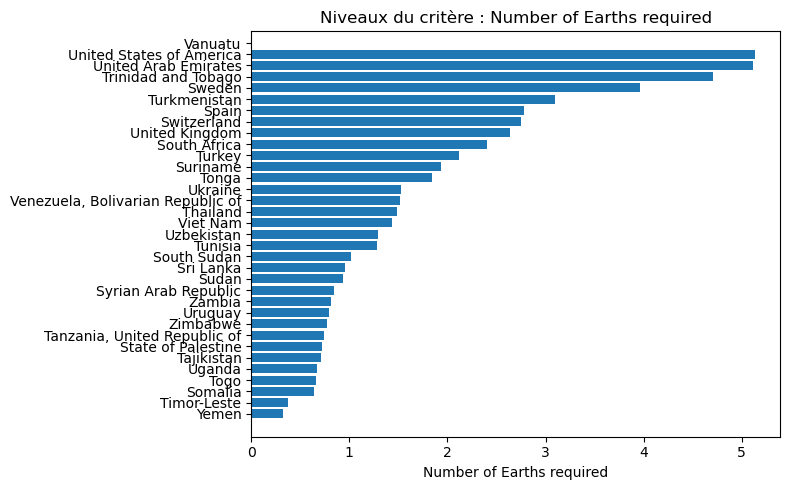

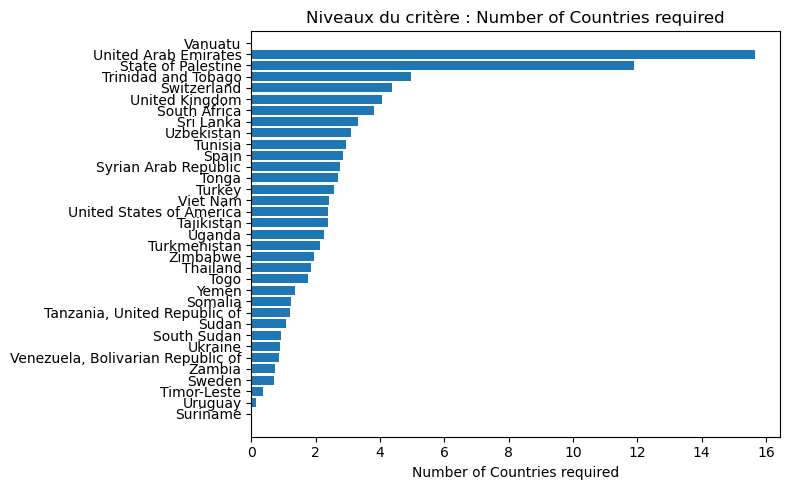

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

colonnes = df.columns

for col in colonnes:
    # ignorer la colonne Pays ou les colonnes non numériques
    if col == "Country" or not pd.api.types.is_numeric_dtype(df[col]):
        continue

    # Trier
    pays_classe = df.sort_values(col)

    # Plot
    plt.figure(figsize=(8,5))
    plt.barh(pays_classe["Country"], pays_classe[col])
    plt.xlabel(col)
    plt.title(f"Niveaux du critère : {col}")
    plt.tight_layout()
    plt.show()